In [20]:
from fol_IO import *
from helpers import *
from scipy.spatial.distance import *

In [104]:
# Remove centroids with no follicles
def remove_bbox_centroids(sd):
    to_del = []
    for sk in sd:
        for fk in sd[sk]:
            if 'outer' in sd[sk][fk].keys():
                if not (sd[sk][fk]['outer'] and sd[sk][fk]['centroid'].any()):
                    to_del.append((sk,fk))
            else:
                to_del.append((sk,fk))
    for d in to_del:
        del(sd[d[0]][d[1]])
def plot_all_fols(slice_dict,I_file):
    """
    Load an image and plot all the follicles. Seems buggy
    :param slice_dict: The tracked follicles in the slice_dict format
    :param I_file: An image file
    :return: None
    """
    I = io.imread(I_file)
    slice_num = int(re.search('_\d{4}\.',I_file).group()[1:-1])
    plt.figure(figsize=(40,20))
    plt.imshow(I,'gray')
    slice = slice_dict[slice_num]
    for fol in slice.itervalues():
        if 'inner' in fol.keys():
            inner = fol['inner']
        if 'outer' in fol.keys():
            outer = fol['outer']
        if 'centroid' in fol.keys():
            centroid = fol['centroid']
#         bbox = fol['bbox']
#         if bbox.any():
#             coord,h,w = verts_to_patch_coords(*bbox)
#             rect = patches.Rectangle(coord,w,h,facecolor='none',edgecolor='r',linewidth=3)
#             plt.gca().add_patch(rect)
        if inner:
            plt.plot(inner[1],inner[0],'r.',markersize=1)
        if outer:
            plt.plot(outer[1],outer[0],'g.',markersize=1)
#         if (outer or inner) and centroid.any():
#             plt.plot(centroid[1], centroid[0], 'b.', markersize=10)
        if centroid.any():
            plt.plot(centroid[1], centroid[0], 'b.', markersize=10)
            
def rotate_by_r(points, r):
    rot = []
    cos_r, sin_r = np.cos(r), np.sin(r)
    for p in points:
        rot.append([p[0] * cos_r - p[1] * sin_r, p[0] * sin_r + p[1] * cos_r])
    return rot

def plot_centroids(points1,points2=None, shifted = True):
    plt.figure(figsize=(10,10))
    if shifted:
        plt.ylim(-2500,2500)
        plt.xlim(-2500,2500)
    else:
        plt.ylim(0,5000)
        plt.xlim(0,5000)
    for p in points1:
        plt.plot(p[1],p[0],'r.', markersize=10)
    if points2:
        for p in points2:
            plt.plot(p[1],p[0],'b.', markersize=10)
    plt.show()

In [100]:
sd = load_fol_data(r'C:\Users\guru\Desktop\follicle_tracking\my.pckl')

In [101]:
# del[sd[32]]
remove_bbox_centroids(sd)

In [102]:
sd.keys()

[32, 33, 34, 30, 31]

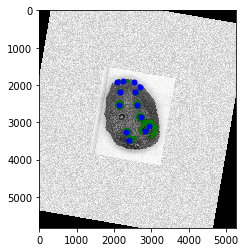

In [17]:
plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0030.tif')

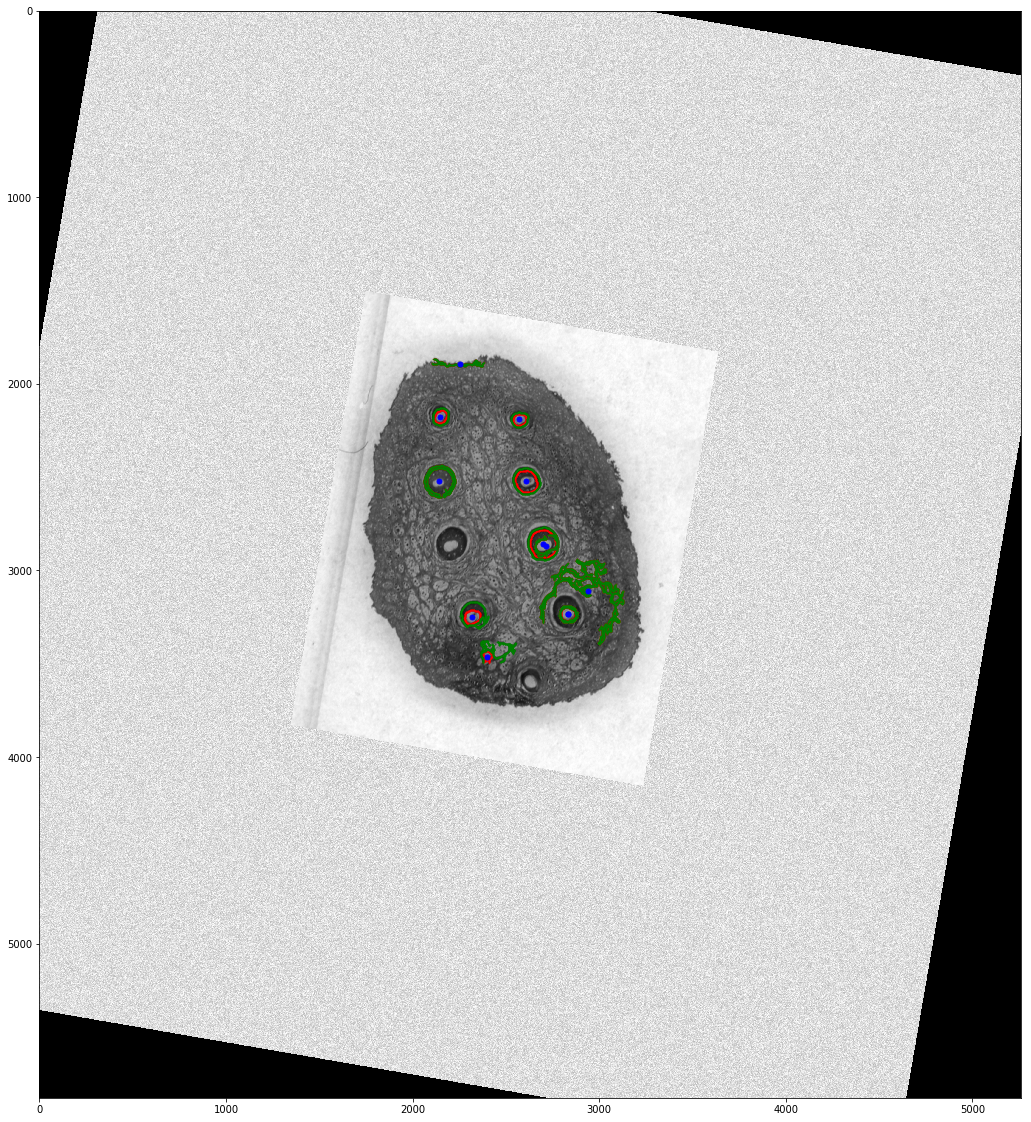

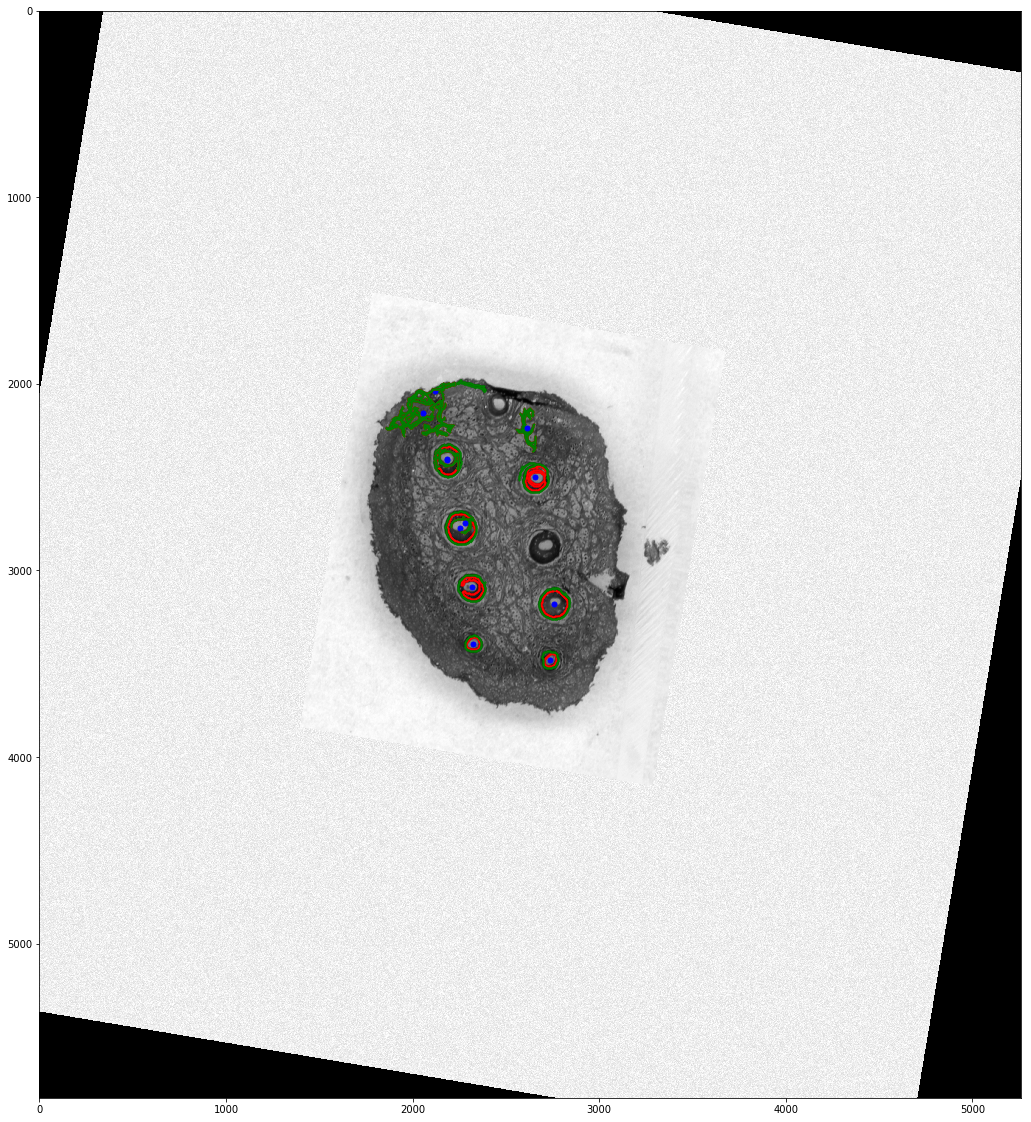

In [59]:
remove_bbox_centroids(sd)
plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0030.tif')
plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0031.tif')

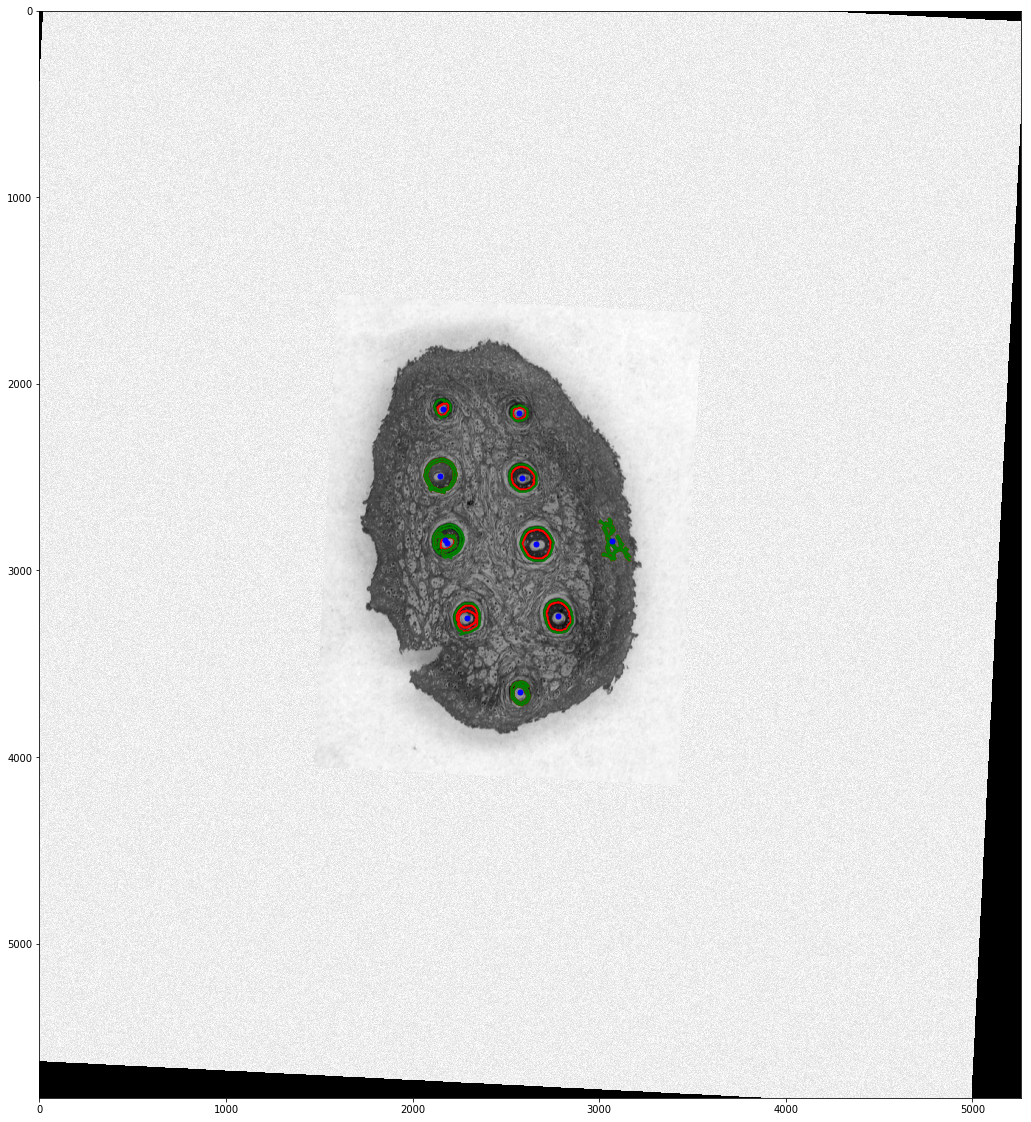

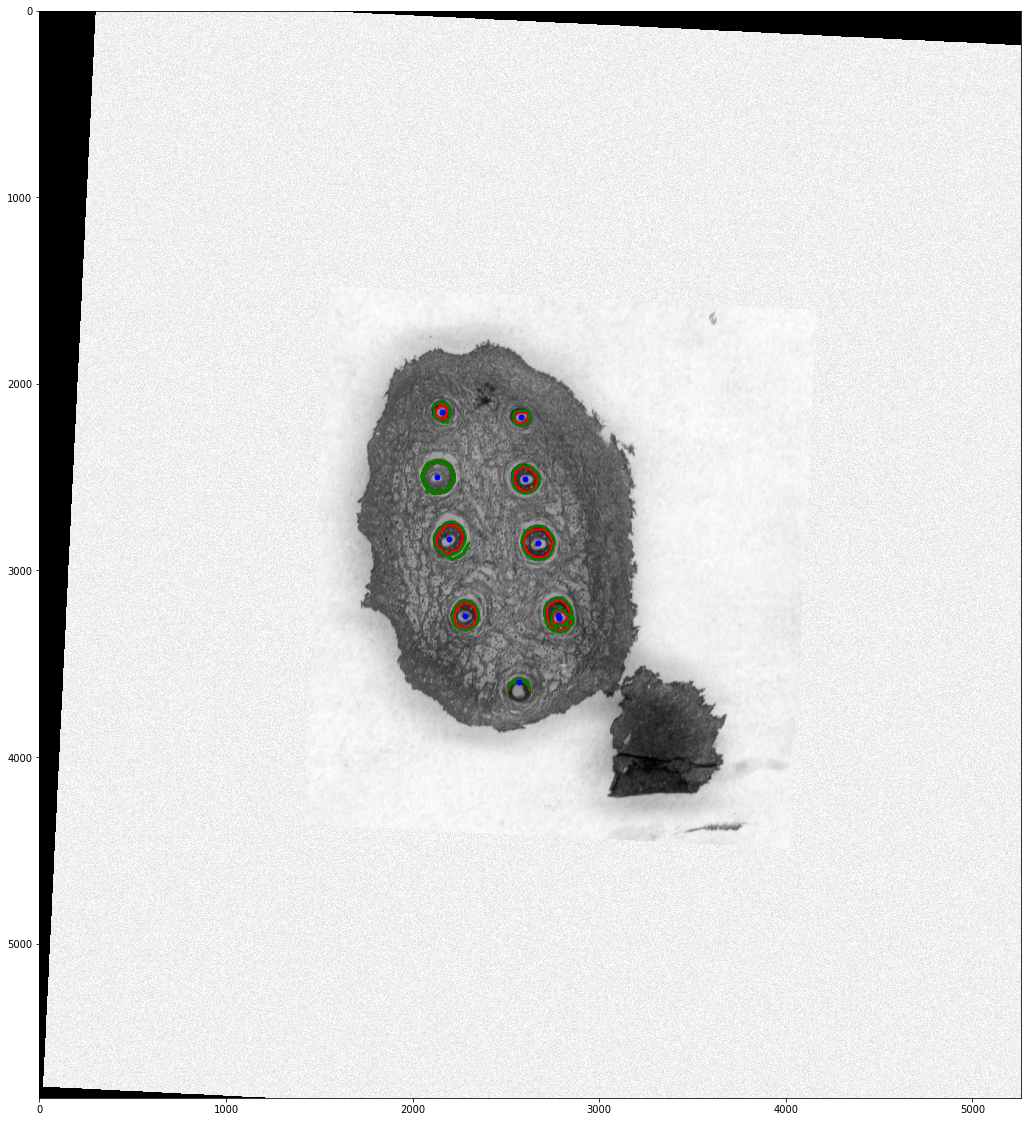

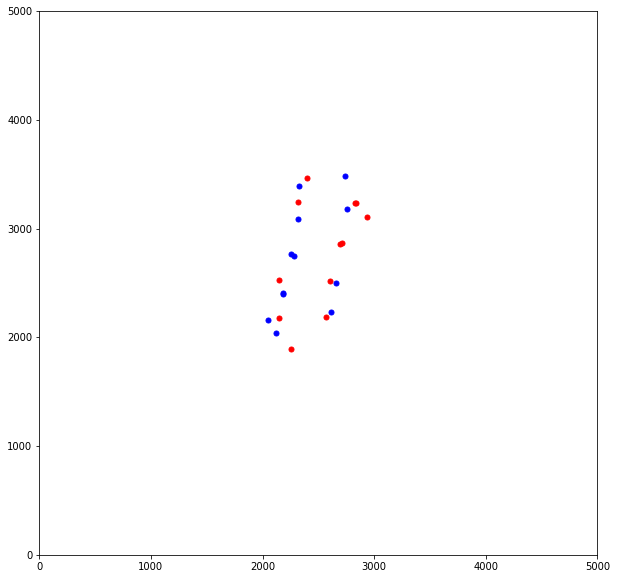

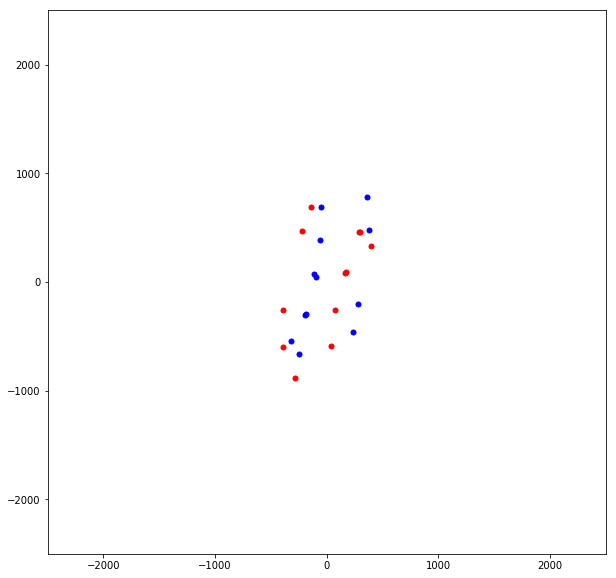

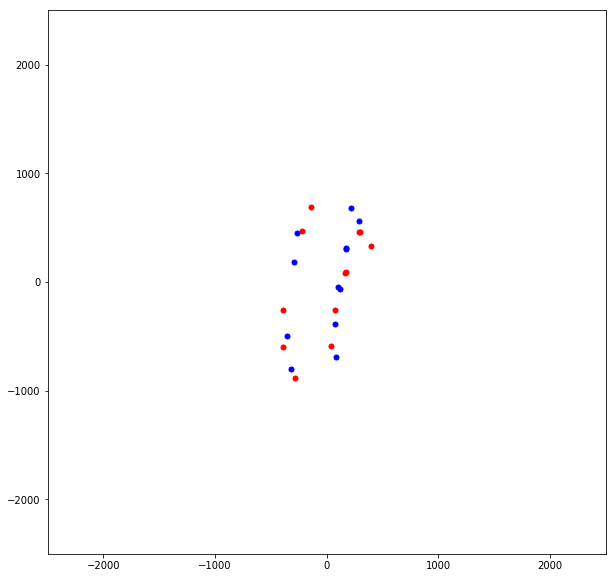

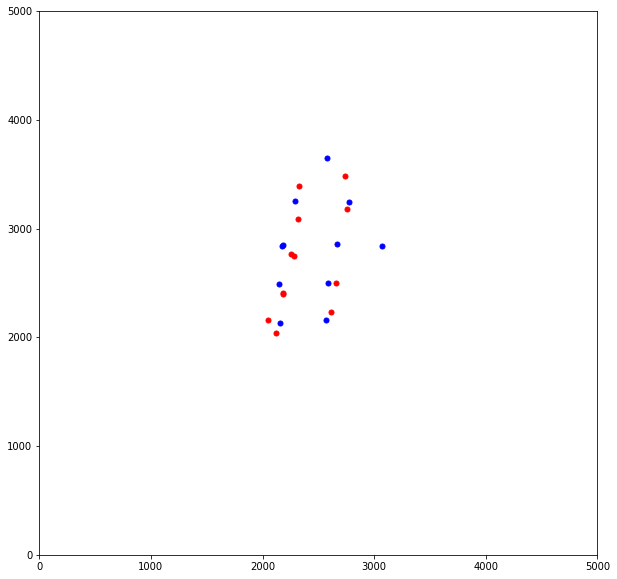

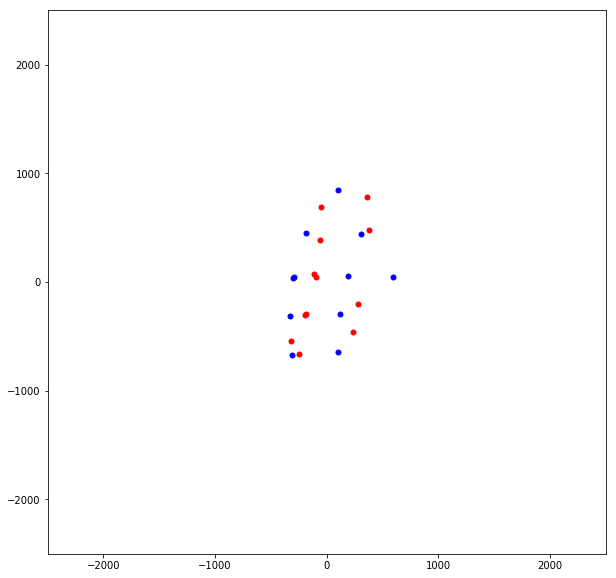

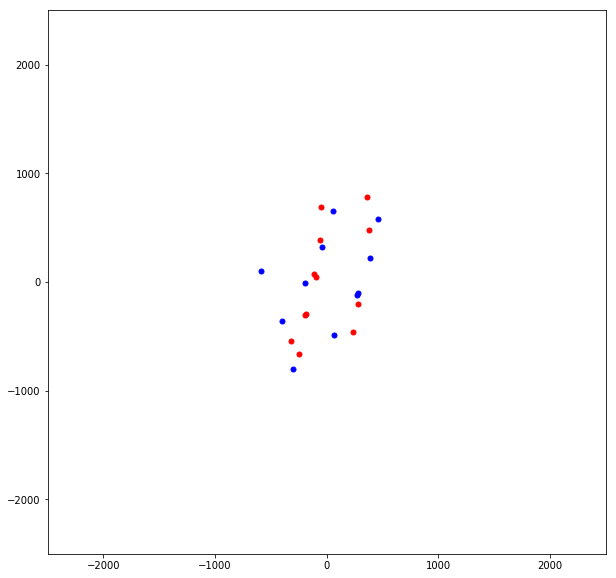

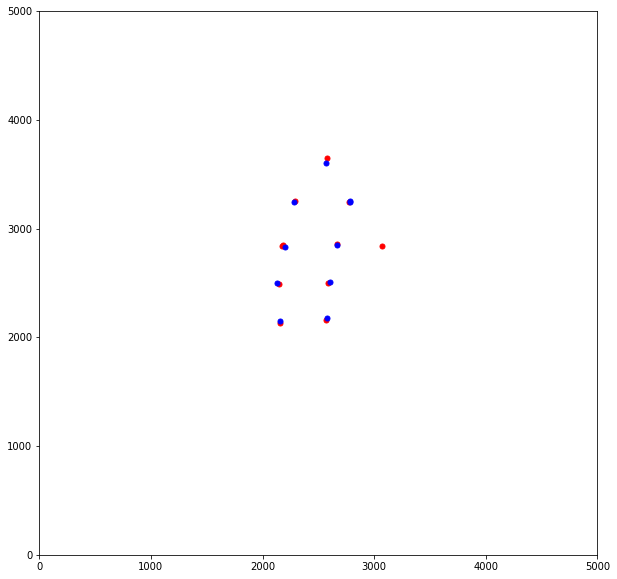

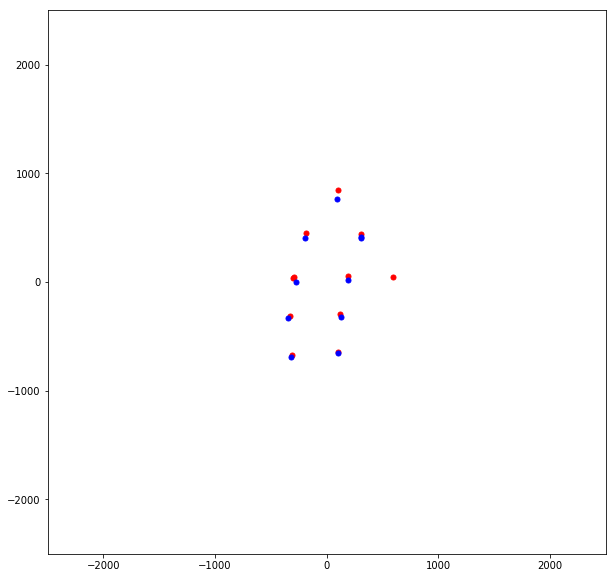

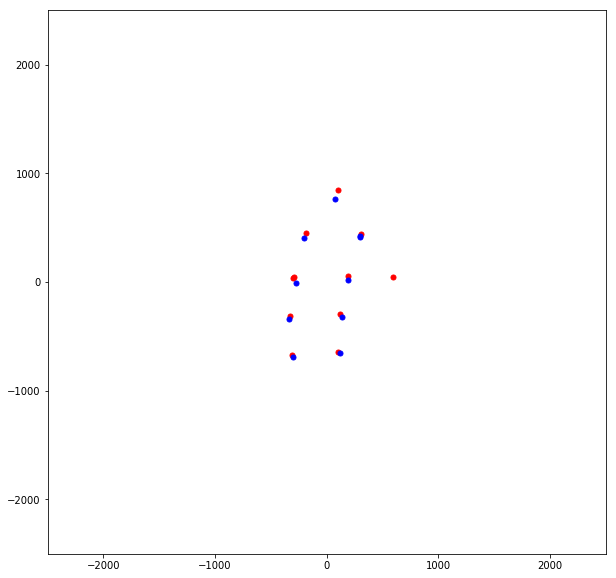

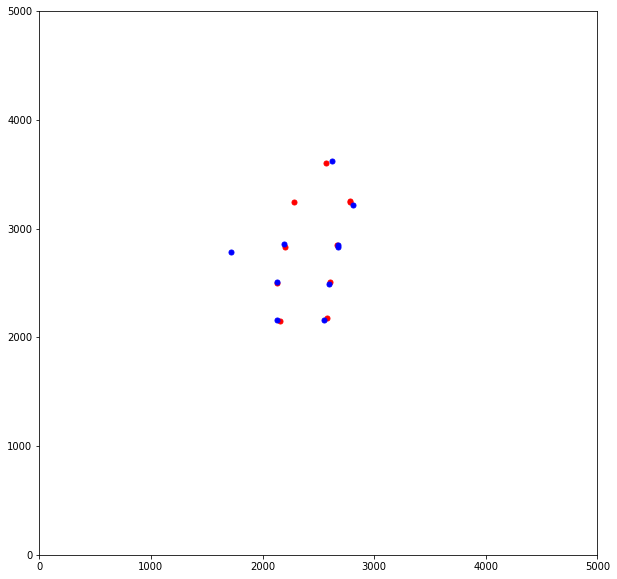

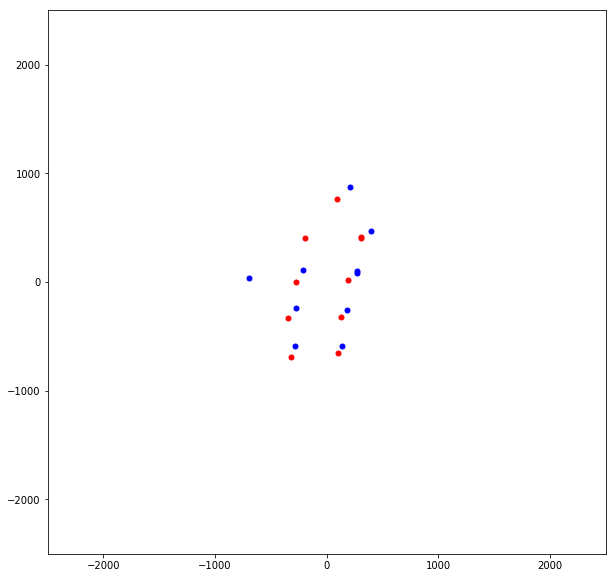

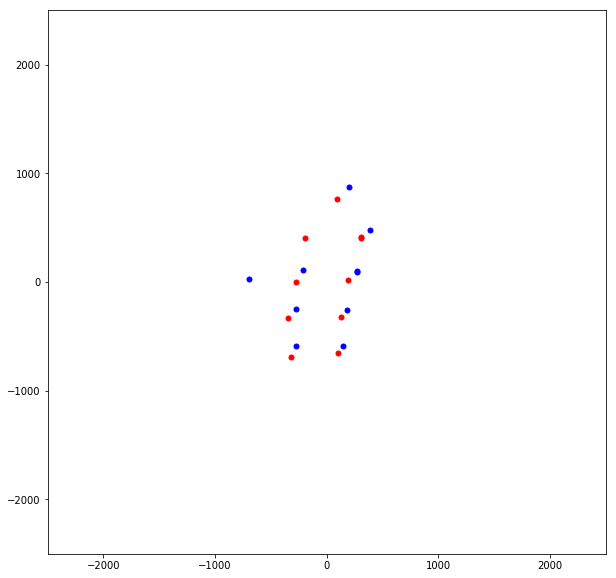

In [106]:
# TODO HERE remove outliers, doubled points first



#get rotation matrix

# get centroid for firs, subtract mean, get centroid for second, subtract mean,
#  iterate over rotations to minimze diffeces between centroid and nearest centroid from prev

plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0032.tif')
plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0033.tif')

rot = {}
sorted_keys = sorted(sd)

for ki in range(len(sorted_keys)-1):
    # get centroids, and centroids shifted so mean point is at origin
    centroids = [[],[]]
    shifted_centroids = [[],[]]
    for i in range(2):
        s = sd[sorted_keys[ki+i]]
        # mean of centroids
        csum = [0,0]       
        for f in s.itervalues():
            centroids[i].append(f['centroid'])
            csum[0] = csum[0]+f['centroid'][0]
            csum[1] = csum[1]+f['centroid'][1]
        cavg = [csum[0]/len(centroids[i]), csum[1]/len(centroids[i])]

        for c in centroids[i]:
            shifted_centroids[i].append((c[0]-cavg[0], c[1]-cavg[1]))
    plot_centroids(centroids[0], centroids[1], False)
    plot_centroids(shifted_centroids[0], shifted_centroids[1])
    # get ballpark of correct rotation
    error = []
    #iteratate over each rotation
    for r in range(0, 2*314):
        rot = rotate_by_r(shifted_centroids[1], r/100.)
#         cd = cdist(shifted_centroids[0], shifted_centroids[1])
        cd = cdist(shifted_centroids[0], rot)
        min_cols = cd.min(axis=0)   # closest point to each centroid from first slice in second slice
        min_rows = cd.min(axis=1)   # closest point in first slice to all points in second slice
        error.append(np.median(min_cols) + np.median(min_rows))
    
    r = error.index(min(error))
    rot = rotate_by_r(shifted_centroids[1], r/100.)
    
    plot_centroids(shifted_centroids[0], rot)
    
    
    # refine rotion and translation by not including centroids that don't show up in both images    
#     pick rotation with smallest error
#     temporarily remove points with no corresponding point in other slice
#     remove centroids that are too close to each other
#     find new center, rot again
#     translate one image by amount that would make centers line up

In [90]:
centroids

[[array([ 1891.96146045,  2253.13387424]),
  array([ 2175.88601036,  2149.46632124]),
  array([ 2191.02538071,  2573.01522843]),
  array([ 2523.08114035,  2143.73135965]),
  array([ 2522.34319527,  2608.9852071 ]),
  array([ 3108.5490982 ,  2939.11748497]),
  array([ 2858.00473934,  2698.28199052]),
  array([ 2867.13620072,  2714.2562724 ]),
  array([ 3233.5       ,  2831.70642202]),
  array([ 3248.08154506,  2319.46781116]),
  array([ 3233.15604396,  2834.77362637]),
  array([ 3461.49726776,  2397.50273224])],
 [array([ 2035.83333333,  2122.5       ]),
  array([ 2157.74139908,  2053.39019495]),
  array([ 2235.88196721,  2614.00874317]),
  array([ 2408.49492386,  2186.16243655]),
  array([ 2400.47076923,  2182.69846154]),
  array([ 2501.84973404,  2657.7393617 ]),
  array([ 2770.33095238,  2256.58571429]),
  array([ 2747.5915493,  2279.8028169]),
  array([ 3087.70036101,  2318.64981949]),
  array([ 3179.29765013,  2757.66057441]),
  array([ 3392.13917526,  2324.7628866 ]),
  array([ 34

In [53]:
cd.shape

(11L, 12L)

In [56]:
np.median(min_cols)

209.26709184035565

In [57]:
np.median(min_rows)

196.06314153010624

In [97]:
sd = load_fol_data(r'C:\Users\guru\Desktop\follicle_tracking\Pad2_follicles_sd.pckl')

In [98]:
a = { your_key: sd[your_key] for your_key in range(30,35) }

In [99]:
pickle.dump( a, open( r'C:\Users\guru\Desktop\follicle_tracking\my.pckl', 'w' ) )

In [ ]:
# 30,31,32 sequence where one gets flipped

In [ ]:
len(sd[137])

In [ ]:
plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0030.tif')

In [95]:
sd = load_fol_data(r'C:\Users\guru\Desktop\follicle_tracking\Pad2_follicles_sd.pckl')

In [ ]:
(int)(len(sd.keys())/2)

In [ ]:
dist(sd[110][10]['centroid'],sd[110][12]['centroid'])

In [ ]:
a = sd[110][10]['centroid']
b = sd[110][19]['centroid']

In [ ]:
print a,b

In [ ]:
((a[0]-b[0])**2 + (a[1]-b[1])**2)**(0.5)

In [ ]:
((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [ ]:
4**(1/2)

In [ ]:
a = { your_key: sd[your_key] for your_key in range(30,33) }

In [ ]:
a.keys()

In [ ]:
(int)(len(sd.keys())/2)

In [ ]:
sd[110][10]

In [ ]:
sd[110][10]['centroid'][0]

In [ ]:
pickle.dump( a, open( r'C:\Users\guru\Desktop\follicle_tracking\my.pckl', 'w' ) )

In [ ]:
sd = load_fol_data(r'C:\Users\guru\Desktop\follicle_tracking\my.pckl')

In [ ]:
sd[110][10]['centroid']

In [ ]:
c = []
for k in sd.keys():
    for k2 in sd[k].keys():
        if 'centroid' in sd[k][k2].keys():
            c.append(sd[k][k2]['centroid']) 

In [ ]:
c[0]

In [ ]:
sd[1]